<a href="https://colab.research.google.com/github/antaripg/metaheuristics-algorithm-notebooks/blob/main/ParticleSwarmOptimization_SteelAlloyYield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [19]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Read the csv file
data_path = "/content/drive/MyDrive/Steel_Strength_dataset/steel_strength.csv"
df = pd.read_csv(data_path)

In [21]:
df.head()

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [22]:
df.isna().sum()

formula             0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          9
dtype: int64

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
c,312.0,0.096442,0.109008,0.00,0.010,0.030,0.1825,0.43
mn,312.0,0.146250,0.397102,0.01,0.010,0.010,0.0800,3.00
si,312.0,0.221218,0.580796,0.01,0.010,0.010,0.1100,4.75
cr,312.0,8.043830,5.426169,0.01,3.100,9.050,12.5200,17.50
ni,312.0,8.184006,6.337055,0.01,0.960,8.500,12.1175,21.00
mo,312.0,2.766090,1.832908,0.02,1.500,2.210,4.0900,9.67
v,312.0,0.183750,0.452462,0.00,0.010,0.010,0.1275,4.32
n,312.0,0.005545,0.018331,0.00,0.000,0.000,0.0000,0.15
nb,312.0,0.035449,0.161537,0.00,0.010,0.010,0.0100,2.50
co,312.0,7.008782,6.254431,0.01,0.010,7.085,13.4800,20.10


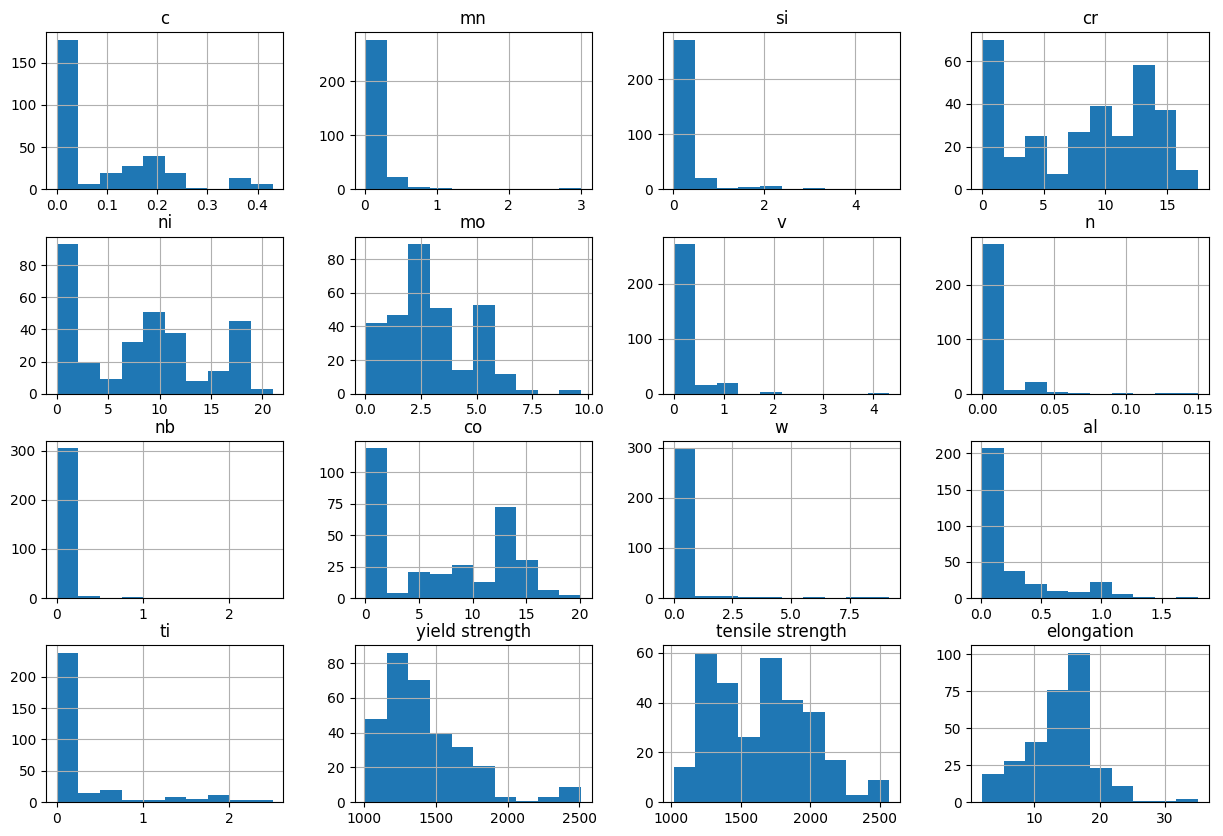

In [24]:
df.hist(figsize=(15,10));

In [25]:
df.dropna(inplace=True)

In [26]:
df_cleaned = df.drop(columns=["formula", "elongation", "tensile strength"])

In [33]:
df_cleaned.corrwith(df_cleaned['yield strength']).reset_index(name='Correlation').sort_values(by='Correlation', ascending=False).rename(columns={"index": "Columns"})

,Columns,Correlation
13,yield strength,1.000000
12,ti,0.508384
4,ni,0.250488
6,v,0.206400
9,co,0.188016
0,c,0.158619
5,mo,0.087743
8,nb,0.035834
10,w,-0.023575
11,al,-0.044841


In [34]:
X = df_cleaned.drop(columns=["yield strength"])
y = df_cleaned["yield strength"]

In [38]:
X.head()

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55
5,0.19,0.02,0.49,12.56,0.94,1.96,0.01,0.00,0.01,20.10,0.00,0.03,0.00


In [52]:
# Split Data into train and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [53]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [54]:
# Scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [55]:
# Y scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
# y_test = scaler.transform(y_test.values.reshape(-1,1))

In [56]:
# Regression Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42,
                              max_depth=100, max_features=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features=10, random_state=42)

In [57]:
y_pred = model.predict(X_test)

In [58]:
# # Inverse Scaling
# y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
# y_test = scaler.inverse_transform(y_test)

In [59]:
# Analyse the model performance

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [60]:
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 125.36146259445009
R2: 0.8236676008808966


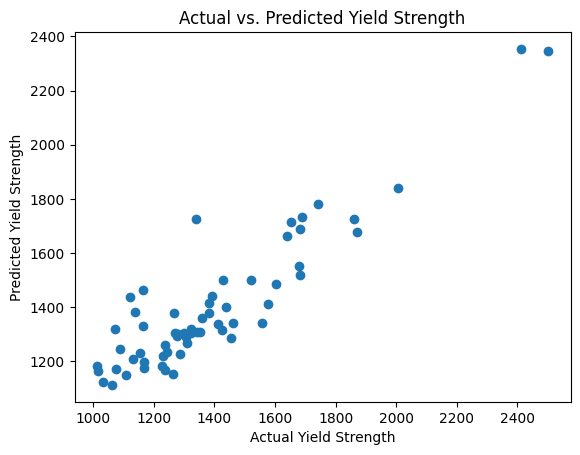

In [61]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Yield Strength')
plt.ylabel('Predicted Yield Strength')
plt.title('Actual vs. Predicted Yield Strength')
plt.show()

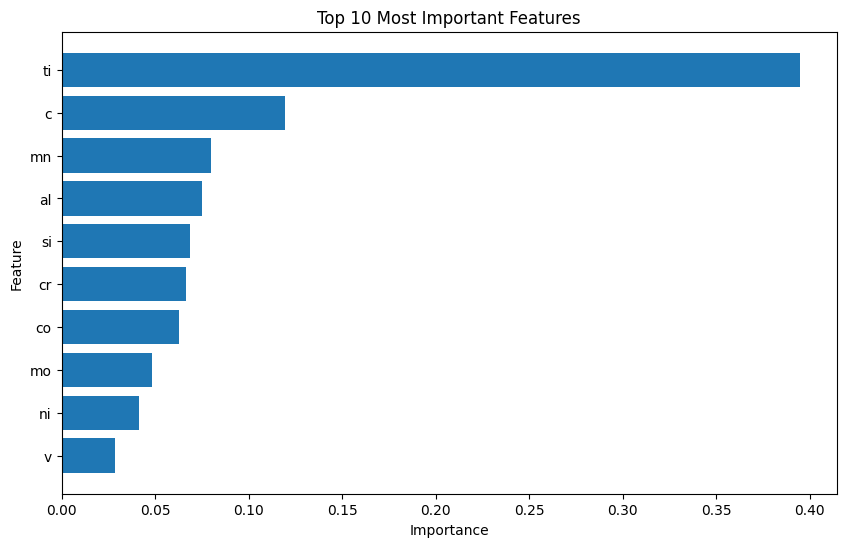

In [65]:
# Get the feature names from the training data
features = X_train.columns

# Extract the importances from the mode
importances = model.feature_importances_

# Create a DataFrame to store the feature names and importances
feature_importance_df = pd.DataFrame({'Feature': features,
                                      'Importance': importances})

# Plot 10 most important features
feature_importance_df_top10 = feature_importance_df.nlargest(10, 'Importance')
feature_importance_df_top10 = feature_importance_df_top10.sort_values(by='Importance',
                                                                      ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_top10['Feature'],
         feature_importance_df_top10['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()

In [66]:
model_all_data = RandomForestRegressor(n_estimators=100, random_state=42,
                              max_depth=100, max_features=10)
model_all_data.fit(X, y)

RandomForestRegressor(max_depth=100, max_features=10, random_state=42)

### PSO Algorithm for Optimization

In [67]:
# Define the objective function


def objective(X):
  X = [X]
  results = model_all_data.predict(X)
  return -results

In [71]:
# Define the boundaries

# Define the boundaries
boundaries = np.array([[df['c'].min(), df['c'].max()],
                        [df['mn'].min(), df['mn'].max()],
                        [df['si'].min(), df['si'].max()],
                        [df['cr'].min(), df['cr'].max()],
                        [df['ni'].min(), df['ni'].max()],
                        [df['mo'].min(), df['mo'].max()],
                        [df['v'].min(), df['v'].max()],
                        [df['n'].min(), df['n'].max()],
                        [df['nb'].min(), df['nb'].max()],
                        [df['co'].min(), df['co'].max()],
                        [df['w'].min(), df['w'].max()],
                        [df['al'].min(), df['al'].max()],
                        [df['ti'].min(), df['ti'].max()]])

In [73]:
boundaries = np.array([[df['c'].min(),
                        df['mn'].min(),
                        df['si'].min(),
                        df['cr'].min(),
                        df['ni'].min(),
                        df['mo'].min(),
                        df['v'].min(),
                        df['n'].min(),
                        df['nb'].min(),
                        df['co'].min(),
                        df['w'].min(),
                        df['al'].min(),
                        df['ti'].min()],
                        [df['c'].max(),
                         df['mn'].max(),
                         df['si'].max(),
                         df['cr'].max(),
                         df['ni'].max(),
                         df['mo'].max(),
                         df['v'].max(),
                         df['n'].max(),
                         df['nb'].max(),
                         df['co'].max(),
                         df['w'].max(),
                         df['al'].max(),
                         df['ti'].max()]])


In [74]:
# Define the parameters of the optimization
n_parameters = 13
n_particles = 100
max_iterations = 2
w = 0.5
c1 = 0.8
c2 = 0.9

# Initialize the particles and velocities
particles = np.random.uniform(low=boundaries[0],
                              high=boundaries[1],
                              size=(n_particles, n_parameters))
velocities = np.zeros((n_particles, n_parameters))

# Initialize the best positions and best costs
best_positions = particles.copy()
best_costs = np.array([objective(p) for p in particles])

# Initialize the global best position and global best cost
global_best_position = particles[0].copy()
global_best_cost = best_costs[0]

# Perform the optimization
for i in range(max_iterations):
    # Update the velocities
    r1, r2 = np.random.rand(n_particles, n_parameters), np.random.rand(n_particles, n_parameters)
    cognitive_component = c1 * r1 * (best_positions - particles)
    social_component = c2 * r2 * (global_best_position - particles)
    velocities = w * velocities + cognitive_component + social_component

    # Update the particles
    particles += velocities

    # Enforce the bounds of the search space
    particles = np.clip(particles, boundaries[0], boundaries[1])

    # Evaluate the objective function
    costs = np.array([objective(p) for p in particles])

    # Update the best positions and best costs
    is_best = costs < best_costs
    #best_positions[is_best] = particles[is_best]
    best_positions[is_best[:, 0]] = particles[is_best[:, 0]]


    best_costs[is_best] = costs[is_best]

    # Update the global best position and global best cost
    global_best_index = np.argmin(best_costs)
    global_best_position = best_positions[global_best_index].copy()
    global_best_cost = best_costs[global_best_index]

    # Print the progress
    #print(f'Iteration {i+1}: Best Cost = {global_best_cost:.6f}')
    print(f'Iteration {i+1}: Best Cost = {global_best_cost.item():.6f}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

Iteration 1: Best Cost = -2323.553000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

Iteration 2: Best Cost = -2329.137000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

In [75]:
# Print the results
print("Best Cost:", global_best_cost)
print("Best Position:", global_best_position)

Best Cost: [-2329.137]
Best Position: [ 0.18720804  1.69281334  1.53853738  1.84529178  4.45411348  6.30223845
  2.54646338  0.04462459  1.85116067 13.90018322  4.60777763  1.25445124
  2.14250348]


#### Using PySwarm Library

In [80]:
!pip install -U -q pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 1.1 MB/s eta 0:00:00


In [81]:
import pyswarms as ps